This is predictive analysis notebook from Microsoft Azure for learning purpose. Codes written here are not written by me, and only modified a little due to difference in python version used, and some code doesnt work anymore. 

https://gallery.azure.ai/Notebook/Predictive-Maintenance-Modelling-Guide-Python-Notebook-1

# Input Data

In [1]:
import pandas as pd

!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_telemetry.csv
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_errors.csv
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_maint.csv
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_failures.csv
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_machines.csv

telemetry = pd.read_csv('PdM_telemetry.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

--2019-01-25 15:30:47--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_telemetry.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13.65.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80142329 (76M) [application/octet-stream]
Saving to: 'PdM_telemetry.csv'

PdM_telemetry.csv   100%[===================>]  76.43M  69.7KB/s    in 18m 28s 

2019-01-25 15:49:17 (70.6 KB/s) - 'PdM_telemetry.csv' saved [80142329/80142329]

--2019-01-25 15:49:17--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_errors.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13

# Data Exploration

In [12]:
#Telemetry Data Exploration

# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

# print total number of records
print("Total number of telemetry records: %d" % len(telemetry.index))

# print the first few telemetry data
print(telemetry.head())

#predictive statistic description of the telemetry data
print(telemetry.describe())

#print(telemetry["machineID"].value_counts().head(100))





Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  
           machineID           volt         rotate       pressure  \
count  876100.000000  876100.000000  876100.000000  876100.000000   
mean       50.500000     170.777736     446.605119     100.858668   
std        28.866087      15.509114      52.673886      11.048679   
min         1.000000      97.333604     138.432075      51.237106   
25%        25.750000     160.304927     412.305714      93.498181   
50%        50.500000 

Text(0.5, 0, 'Date')

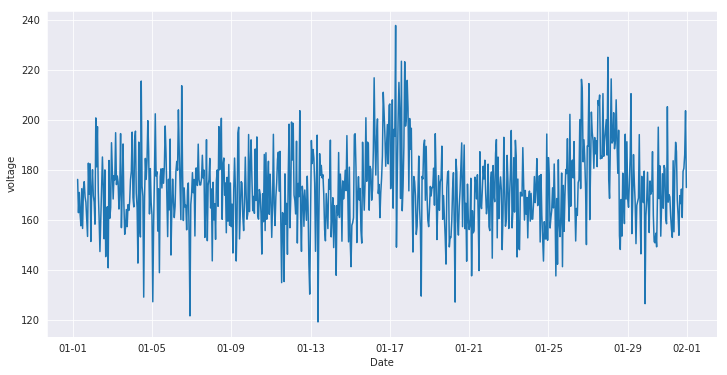

In [4]:
#Plot the Voltage values for machineID 1 for the first half of 2015

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

In [16]:
# Error Logs

#format datetime from strings into datetime format
errors["datetime"] = pd.to_datetime(errors["datetime"], format = "%Y-%m-%d %H:%M:%S")

#convert errorID strings into categorical data
errors["errorID"] = errors["errorID"].astype("category")

# print total number of records
print("Total number of error records: %d" % len(errors.index))

print(errors.head())

Total number of error records: 3919
             datetime  machineID errorID
0 2015-01-03 07:00:00          1  error1
1 2015-01-03 20:00:00          1  error3
2 2015-01-04 06:00:00          1  error5
3 2015-01-10 15:00:00          1  error4
4 2015-01-22 10:00:00          1  error4


Text(0, 0.5, 'Count')

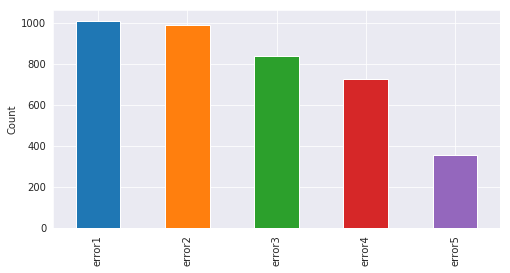

In [18]:
#plot errorsid count
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [19]:
#Maintenance Data Exploration

# format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

print("Total number of maintenance records: %d" % len(maint.index))
print(maint.head())

Total number of maintenance records: 3286
             datetime  machineID   comp
0 2014-06-01 06:00:00          1  comp2
1 2014-07-16 06:00:00          1  comp4
2 2014-07-31 06:00:00          1  comp3
3 2014-12-13 06:00:00          1  comp1
4 2015-01-05 06:00:00          1  comp4


In [20]:
#Machines Data Exploration

machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
print(machines.head())

Total number of machines: 100
   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2


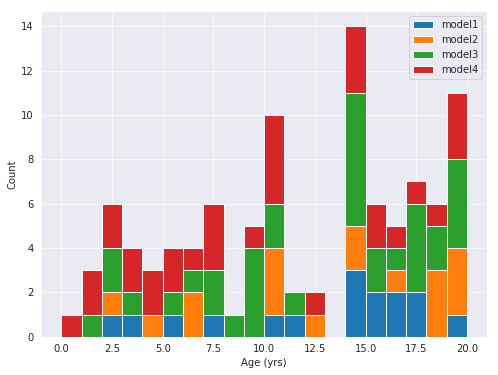

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [22]:
#Failures Data Exploration

# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


Text(0, 0.5, 'Count')

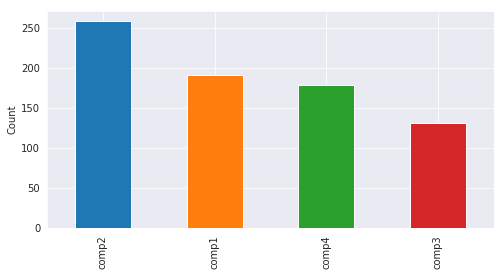

In [23]:

sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')

# Feature Engineering

In [85]:
# Lag Features Engineering from telemetry data

#Calculate mean values:


# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

print(telemetry_mean_3h.head())
print(telemetry_sd_3h.head());

   machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-01 09:00:00   170.028993     449.533798        94.592122   
1          1 2015-01-01 12:00:00   164.192565     403.949857       105.687417   
2          1 2015-01-01 15:00:00   168.134445     435.781707       107.793709   
3          1 2015-01-01 18:00:00   165.514453     430.472823       101.703289   
4          1 2015-01-01 21:00:00   168.809347     437.111120        90.911060   

   vibrationmean_3h  
0         40.893502  
1         34.255891  
2         41.239405  
3         40.373739  
4         41.738542  
   machineID            datetime  voltsd_3h  rotatesd_3h  pressuresd_3h  \
0          1 2015-01-01 09:00:00   6.721032    67.849599      18.934956   
1          1 2015-01-01 12:00:00   7.596570    50.120452       8.555032   
2          1 2015-01-01 15:00:00  10.124584    55.084734       5.909721   
3          1 2015-01-01 18:00:00   4.673269    42.047278       4.554047   
4     

In [87]:
#For capturing longer effect 24h

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append((pd.pivot_table(telemetry,
                                index='datetime',
                                columns='machineID',
                                values=col).resample('3H',
                                                     closed='left',
                                                     label='right').first().unstack().rolling(window=24).mean()))
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

#Repeat for Standard Deviation

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append((pd.pivot_table(telemetry,
                                index='datetime',
                                columns='machineID',
                                values=col).resample('3H',
                                                     closed='left',
                                                     label='right').first().unstack().rolling(window=24).std()))

telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

#See the table
telemetry_mean_24h.head(10)
# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000
mean,50.503899,170.777344,446.605536,100.858665,40.384696,13.299177,44.456698,8.885976,4.441105,170.738342,446.622451,100.871860,40.382356,15.055923,50.680485,10.330242,5.103534
std,28.863913,9.501061,33.130486,7.414592,3.478391,6.966005,23.217195,4.656154,2.320281,4.178951,15.686284,3.983127,1.764322,2.383652,8.368899,2.129642,0.921640
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,156.713608,310.118604,91.162625,35.800869,6.178154,18.363177,4.275651,2.108104
25%,26.000000,164.449518,427.559989,96.238713,38.147732,8.027807,26.903727,5.370694,2.684653,168.100594,440.859663,98.730139,39.379127,13.409911,44.992826,8.984156,4.488631
50%,51.000000,170.434250,448.382424,100.234309,40.145805,12.495649,41.794255,8.346061,4.173937,170.285725,448.772454,100.195972,40.107229,14.942428,50.156537,10.009680,5.008386
75%,76.000000,176.612207,468.448273,104.406729,42.227512,17.688547,59.105539,11.790367,5.899868,172.609273,456.129192,101.780484,40.908734,16.556760,55.657662,11.199380,5.589524
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,206.333895,491.081522,138.291979,55.266429,30.806053,117.198342,30.665847,12.757609


In [88]:
# Lag Features from Error table
# Error table consists of categorical data, so dont use average but value counts of each error type for given set of time

#Start by reformatting the error data to have one entry per machine per time at which at least one error occurred: 
    
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head()

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0


In [89]:
#add blank entries for all other hourly timepoints with Nan values (no error at those time):
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.head()



,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,0.0,0.0,0.0,0.0,0.0


In [90]:
# Compute the total number of errors of each type over the last 24 hours, for timepoints taken every three hours:

temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append((pd.pivot_table(error_count,
                                index='datetime',
                                columns='machineID', 
                                values=col).resample('3H', closed='left', label='right').first().unstack().rolling(window=24).sum()))
                                                     
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0


Days Since Last Replacement from Maintenance

A crucial data set in this example is the maintenance records which contain the information of component replacement records. Possible features from this data set can be, for example, the number of replacements of each component in the last 3 months to incorporate the frequency of replacements. However, more relevent information would be to calculate how long it has been since a component is last replaced as that would be expected to correlate better with component failures since the longer a component is used, the more degradation should be expected.

As a side note, creating lagging features from maintenance data is not as straightforward as for telemetry and errors, so the features from this data are generated in a more custom way. This type of ad-hoc feature engineering is very common in predictive maintenance since domain knowledge plays a big role in understanding the predictors of a problem. In the following, the days since last component replacement are calculated for each component type as features from the maintenance data.


In [78]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [125]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull()]
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    comp_rep[comp] = pd.to_datetime(comp_rep[comp], format = "%Y-%m-%d %H:%M:%S")
    
        
    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

#replace dates of most recent component change with days since most recent component change.
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')
    
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


The machine features can be used without further modification. These include descriptive information about the type of each machine and its age (number of years in service). If the age information had been recorded as a "first use date" for each machine, a transformation would have been necessary to turn those into a numeric values indicating the years in service.

Lastly, we merge all the feature data sets we created earlier to get the final feature matrix.

In [135]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.describe())
final_feat.head()


           machineID    voltmean_3h  rotatemean_3h  pressuremean_3h  \
count  291977.000000  291977.000000  291977.000000    291977.000000   
mean       50.503899     170.777344     446.605536       100.858665   
std        28.863913       9.501061      33.130486         7.414592   
min         1.000000     125.532506     211.811184        72.118639   
25%        26.000000     164.449518     427.559989        96.238713   
50%        51.000000     170.434250     448.382424       100.234309   
75%        76.000000     176.612207     468.448273       104.406729   
max       100.000000     241.420717     586.682904       162.309656   

       vibrationmean_3h      voltsd_3h    rotatesd_3h  pressuresd_3h  \
count     291977.000000  291977.000000  291977.000000  291977.000000   
mean          40.384696      13.299177      44.456698       8.885976   
std            3.478391       6.966005      23.217195       4.656154   
min           26.569635       0.025509       0.078991       0.027417   


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18


Label Construction


In [173]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
labeled_features["failure"]=labeled_features["failure"].astype(object).fillna(method = 'bfill', limit = 7) # fill backward up to 24h
labeled_features["failure"]=labeled_features["failure"].astype(object).fillna('none')
labeled_features.head()




,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,none
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4


# Modelling



In [175]:
from sklearn.ensemble import GradientBoostingClassifier

# make test and training splits
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
models = []
for last_train_date, first_test_date in threshold_dates:
    # split out training and test data
    train_y = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], 1))
    test_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(['datetime',
                                                                                                       'machineID',
                                                                                                       'failure'], 1))
    # train and predict using the model, storing results for later
    my_model = GradientBoostingClassifier(random_state=42)
    my_model.fit(train_X, train_y)
    test_result = pd.DataFrame(labeled_features.loc[labeled_features['datetime'] > first_test_date])
    test_result['predicted_failure'] = my_model.predict(test_X)
    test_results.append(test_result)
    models.append(my_model)

we plot the feature importances in the (first) trained model:

Text(0, 0.5, 'Importance')

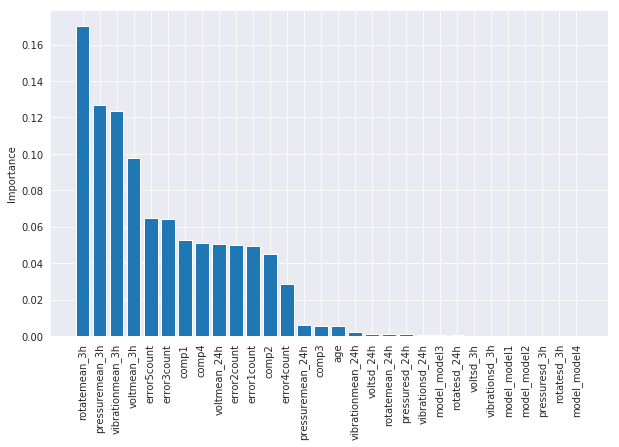

In [176]:

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=True, key=lambda x: x[1]))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

# Model Evaluation
In predictive maintenance, machine failures are usually rare occurrences in the lifetime of the assets compared to normal operation. This causes an imbalance in the label distribution which usually causes poor performance as algorithms tend to classify majority class examples better at the expense of minority class examples as the total misclassification error is much improved when majority class is labeled correctly. This causes low recall rates although accuracy can be high and becomes a larger problem when the cost of false alarms to the business is very high. To help with this problem, sampling techniques such as oversampling of the minority examples are usually used along with more sophisticated techniques which are not covered in this notebook.

Text(0, 0.5, 'Count')

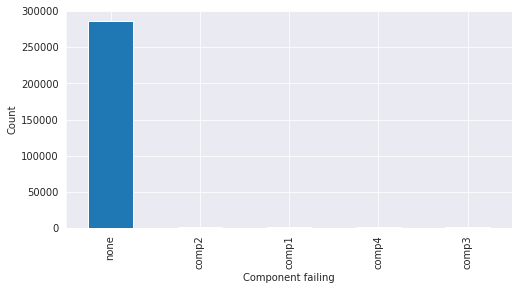

In [177]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
labeled_features['failure'].value_counts().plot(kind='bar')
plt.xlabel('Component failing')
plt.ylabel('Count')

we use an evaluation function that computes many important evaluation metrics along with baseline metrics for classification problems. 

In [178]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(['accuracy', 'precision', 'recall', 'F1'])
    
    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(['macro precision', 'macro recall', 'macro F1'])
    
    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)
    
    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(['average accuracy',
                          'micro-averaged precision/recall/F1'])
    
    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(['majority class accuracy', 'majority class recall',
                          'majority class precision', 'majority class F1'])
        
    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(['expected accuracy', 'kappa'])
    

    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(['random guess accuracy', 'random guess precision',
                          'random guess recall', 'random guess F1'])
    
    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(['random weighted guess accuracy',
                          'random weighted guess precision',
                          'random weighted guess recall',
                          'random weighted guess F1'])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df

In [179]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[120206     40     23     21     27]
 [    20    502      6      6      3]
 [     3      3    864      0      2]
 [    14      0      2    366      1]
 [     5      1      5      1    498]]

Split 2:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[95905    32     6    18    20]
 [   18   391     4     0     4]
 [    4     1   702     2     2]
 [   14     1     2   283     1]
 [    5     1     2     1   394]]

Split 3:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[72387    11     7     8    20]
 [   18   290     4     1     2]
 [    3     1   554     0     1]
 [    8     0     1   207     3]
 [    3     0     2     0   278]]


,none,comp1,comp2,comp3,comp4
accuracy,0.998508,0.998508,0.998508,0.998508,0.998508
precision,0.999651,0.919414,0.960000,0.928934,0.937853
recall,0.999077,0.934823,0.990826,0.955614,0.976471
F1,0.999364,0.927054,0.975169,0.942085,0.956772
macro precision,0.949170,0.949170,0.949170,0.949170,0.949170
macro recall,0.971362,0.971362,0.971362,0.971362,0.971362
macro F1,0.960089,0.960089,0.960089,0.960089,0.960089
average accuracy,0.999403,0.999403,0.999403,0.999403,0.999403
micro-averaged precision/recall/F1,0.998508,0.998508,0.998508,0.998508,0.998508
majority class accuracy,0.981226,0.000000,0.000000,0.000000,0.000000


In [180]:
recall_df = pd.DataFrame([evaluation_results[0].loc['recall'].values,
                          evaluation_results[1].loc['recall'].values,
                          evaluation_results[2].loc['recall'].values],
                         columns = ['none', 'comp1', 'comp2', 'comp3', 'comp4'],
                         index = ['recall for first split',
                                  'recall for second split',
                                  'recall for third split'])
recall_df

,none,comp1,comp2,comp3,comp4
recall for first split,0.999077,0.934823,0.990826,0.955614,0.976471
recall for second split,0.999208,0.937650,0.987342,0.940199,0.977667
recall for third split,0.999365,0.920635,0.991055,0.945205,0.982332


The recall rates for all components as well as no failure are all above 90% meaning the model was able to capture above 90% of the failures correctly.